# Projeto de limpeza e tratamento de dados

Aparencia: sol, chuva, nublado  
Temperatura: -130 ~ 130 F  
Umidade: 0 ~ 100  
Vento: VERDADEIRO, FALSO  
Jogar: sim, nao  

In [2]:
import pandas as pd
import seaborn as sb
import statistics as sts

In [3]:
dados = pd.read_csv("tempo.csv", sep=";")
dados

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
6,menos,64,65.0,VERDADEIRO,sim
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
9,chuva,75,200.0,NaN,sim


In [4]:
dados.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [5]:
dados.shape

(14, 5)

In [6]:
aparencia = dados.groupby(["Aparencia"]).size()
aparencia

Aparencia
chuva      5
menos      1
nublado    3
sol        5
dtype: int64

In [7]:
dados.count()

Aparencia      14
Temperatura    14
Umidade        13
Vento          13
Jogar          14
dtype: int64

In [8]:
dados.loc[dados["Aparencia"] == "menos"]

,Aparencia,Temperatura,Umidade,Vento,Jogar
6,menos,64,65.0,VERDADEIRO,sim


In [9]:
dados.loc[dados["Aparencia"] == "chuva"]

,Aparencia,Temperatura,Umidade,Vento,Jogar
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim
5,chuva,65,70.0,VERDADEIRO,nao
9,chuva,75,200.0,NaN,sim
13,chuva,71,91.0,VERDADEIRO,nao


In [10]:
dados.loc[dados["Aparencia"] == "sol"]

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
7,sol,1220,95.0,FALSO,nao
8,sol,69,70.0,FALSO,sim
10,sol,75,70.0,VERDADEIRO,sim


In [11]:
dados.loc[dados["Aparencia"] == "menos", "Aparencia"] = "chuva"

In [12]:
dados.loc[dados["Aparencia"] == "menos"]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [13]:
aparencia = dados.groupby(["Aparencia"]).size()
aparencia

Aparencia
chuva      6
nublado    3
sol        5
dtype: int64

In [14]:
dados.count()

Aparencia      14
Temperatura    14
Umidade        13
Vento          13
Jogar          14
dtype: int64

Aparencia: OK  
Temperatura: Verificar  
Umidade: Verificar  
Vento: Verificar  
Jogar: Verificar  

In [15]:
temperatura = dados.groupby(["Temperatura"]).size()
temperatura.isnull().sum()

0

<AxesSubplot: xlabel='Temperatura', ylabel='Count'>

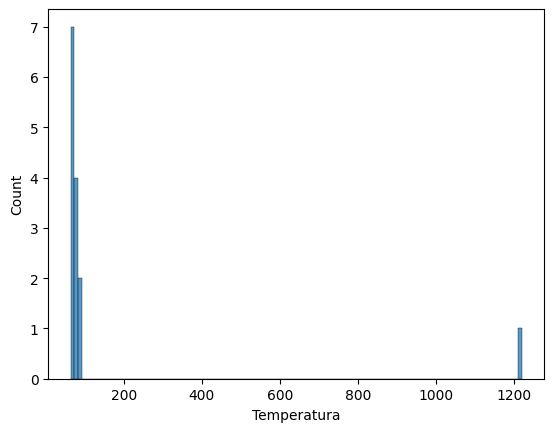

In [16]:
sb.histplot(dados["Temperatura"])

In [17]:
dados.loc[(dados["Temperatura"] < -130) | (dados["Temperatura"] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar
7,sol,1220,95.0,FALSO,nao


In [18]:
dados["Temperatura"].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

In [19]:
mediana = sts.median(dados["Temperatura"])
mediana

73.5

In [20]:
dados.loc[(dados["Temperatura"] < -130) | (dados["Temperatura"] > 130), "Temperatura"] = mediana

In [21]:
dados.loc[(dados["Temperatura"] < -130) | (dados["Temperatura"] > 130)]

,Aparencia,Temperatura,Umidade,Vento,Jogar


In [22]:
temperatura = dados.groupby(["Temperatura"]).size()
temperatura

Temperatura
64.0    1
65.0    1
68.0    1
69.0    1
70.0    1
71.0    1
72.0    1
73.5    1
75.0    2
80.0    1
81.0    1
83.0    1
85.0    1
dtype: int64

Aparencia: OK  
Temperatura: OK  
Umidade: Verificar  
Vento: Verificar  
Jogar: Verificar  

In [23]:
umidade = dados.groupby(["Umidade"]).size()
umidade

Umidade
65.0     1
70.0     3
75.0     1
80.0     1
85.0     1
86.0     1
90.0     2
91.0     1
95.0     1
200.0    1
dtype: int64

<AxesSubplot: >

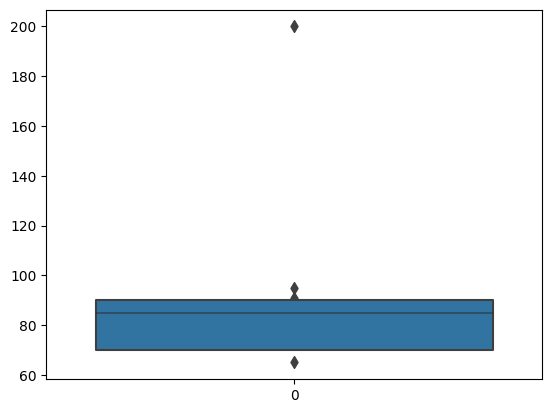

In [24]:
sb.boxenplot(dados["Umidade"])

In [25]:
dados["Umidade"].describe()

count     13.000000
mean      89.769231
std       34.540203
min       65.000000
25%       70.000000
50%       85.000000
75%       90.000000
max      200.000000
Name: Umidade, dtype: float64

In [26]:
mediana = sts.median(dados["Umidade"])
mediana

85.5

In [27]:
dados["Umidade"].fillna(mediana, inplace=True)

In [28]:
umidade = dados.groupby(["Umidade"]).size()
umidade

Umidade
65.0     1
70.0     3
75.0     1
80.0     1
85.0     1
85.5     1
86.0     1
90.0     2
91.0     1
95.0     1
200.0    1
dtype: int64

In [29]:
dados["Umidade"].isnull().sum()

0

In [30]:
dados.loc[dados["Umidade"] == 200]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,200.0,NaN,sim


In [31]:
dados.loc[dados["Umidade"] == 200, "Umidade"] = mediana

In [32]:
dados.loc[dados["Umidade"] == 200]

,Aparencia,Temperatura,Umidade,Vento,Jogar


Aparencia: OK  
Temperatura: OK  
Umidade: OK  
Vento: Verificar  
Jogar: Verificar 

In [33]:
vento = dados.groupby(["Vento"]).size()
vento

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [34]:
dados.loc[dados["Vento"].isin(["VERDADEIRO", "FALSO"])]

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
5,chuva,65.0,70.0,VERDADEIRO,nao
6,chuva,64.0,65.0,VERDADEIRO,sim
7,sol,73.5,95.0,FALSO,nao
8,sol,69.0,70.0,FALSO,sim
10,sol,75.0,70.0,VERDADEIRO,sim


In [35]:
dados.shape

(14, 5)

In [36]:
dados

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
5,chuva,65.0,70.0,VERDADEIRO,nao
6,chuva,64.0,65.0,VERDADEIRO,sim
7,sol,73.5,95.0,FALSO,nao
8,sol,69.0,70.0,FALSO,sim
9,chuva,75.0,85.5,NaN,sim


In [38]:
dados.loc[dados["Vento"].isin(["VERDADEIRO", "FALSO"]) == False]

,Aparencia,Temperatura,Umidade,Vento,Jogar
9,chuva,75.0,85.5,NaN,sim


In [39]:
dados.loc[dados["Vento"].isin(["VERDADEIRO", "FALSO"]) == False, "Vento"] = "FALSO"

In [40]:
vento = dados.groupby(["Vento"]).size()
vento

Vento
FALSO         8
VERDADEIRO    6
dtype: int64

Aparencia: OK  
Temperatura: OK  
Umidade: OK  
Vento: OK  
Jogar: OK  

In [41]:
dados

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim
5,chuva,65.0,70.0,VERDADEIRO,nao
6,chuva,64.0,65.0,VERDADEIRO,sim
7,sol,73.5,95.0,FALSO,nao
8,sol,69.0,70.0,FALSO,sim
9,chuva,75.0,85.5,FALSO,sim
